<a href="https://colab.research.google.com/github/Siriprapa-tewee/229351/blob/main/229351_LAB09_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 9

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [ ]:
# ONLY RUN THIS WHEN THERE IS AN ERROR
!pip install --user statsmodels==0.13.1

In [13]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-23 10:53:45--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.008s  

2025-09-23 10:53:45 (17.0 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [14]:
!pip3 install pmdarima

In [3]:
!pip install numpy==1.26.4
!pip install pmdarima

In [4]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [5]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
#def parser(dates):
  #return pd.datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                     #   date_parser=parser
                   )

data.head()

,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [6]:
y = data['MaxTemp'].resample("M").mean()

/tmp/ipython-input-3759875875.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y = data['MaxTemp'].resample("M").mean()


In [7]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [8]:
train = y[:-24]
test = y[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, dtype: float64


## Test stationarity

### KPSS
- $H_0$: data is stationary
- $H_1$: data is **not** stationary


### ADF
- $H_0$: data is **not** stationary
- $H_1$: data is stationary


In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

def KPSStest(timeseries):
  kpsstest = kpss(timeseries)
  print('KPSS test')
  print('Test Statistic: ',kpsstest[0])
  print('p-value: ',kpsstest[1])
  print('Number of Observations Used: ',kpsstest[2])
  print('Critical Values: ',kpsstest[3])

def ADFtest(timeseries):
  adftest = adfuller(timeseries)
  print('ADF test')
  print('Test Statistic: ',adftest[0])
  print('p-value: ',adftest[1])
  print('#Lags Used: ',adftest[2])
  print('Number of Observations Used: ',adftest[3])
  print('Critical Values: ',adftest[4])

In [10]:
KPSStest(y)
ADFtest(y)

KPSS test
Test Statistic:  0.6428439386603282
p-value:  0.018741460121788345
Number of Observations Used:  4
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -2.222023197657817
p-value:  0.19834961731512274
#Lags Used:  13
Number of Observations Used:  245
Critical Values:  {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}


In [11]:
print(y)
print(y.shift())

Date
1998-01-31    31.687097
1998-02-28    33.685714
1998-03-31    37.103226
1998-04-30    37.910000
1998-05-31    35.848387
                ...    
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: ME, Name: MaxTemp, Length: 259, dtype: float64
Date
1998-01-31          NaN
1998-02-28    31.687097
1998-03-31    33.685714
1998-04-30    37.103226
1998-05-31    37.910000
                ...    
2019-03-31    34.564286
2019-04-30    37.051613
2019-05-31    39.716667
2019-06-30    37.680645
2019-07-31    35.466667
Freq: ME, Name: MaxTemp, Length: 259, dtype: float64


In [12]:
y_diff = y-y.shift()
y_diff.dropna(inplace=True)

KPSStest(y_diff)
ADFtest(y_diff)

KPSS test
Test Statistic:  0.04516874529942415
p-value:  0.1
Number of Observations Used:  28
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -6.227064576112576
p-value:  5.0583827570587737e-08
#Lags Used:  12
Number of Observations Used:  245
Critical Values:  {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}


/tmp/ipython-input-3817557194.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries)



สร้างและประเมินโมเดล SARIMA สำหรับข้อมูลอนุกรมเวลาที่ให้มา โดยพิจารณาอันดับต่างๆ ของโมเดลทั้งแบบธรรมดาและแบบฤดูกาล จากนั้นระบุโมเดลที่ดีที่สุดตามประสิทธิภาพ

In [ ]:
potential_orders = []
for p in [0, 1, 2, 3]:
    for q in [0, 1, 2]:
        if not (p == 0 and q == 0): # Exclude (0, 0)
            potential_orders.append((p, 1, q))

print("Potential non-seasonal (p, d, q) orders:")
for order in potential_orders:
    print(order)

Potential non-seasonal (p, d, q) orders:
(0, 1, 1)
(0, 1, 2)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)


## Determine seasonal sarima orders

In [ ]:
potential_seasonal_orders = []
for P in [0, 1]:
    for Q in [0, 1]:
        potential_seasonal_orders.append((P, 1, Q, 12))

print("Potential seasonal (P, D, Q, s) orders:")
for order in potential_seasonal_orders:
    print(order)

Potential seasonal (P, D, Q, s) orders:
(0, 1, 0, 12)
(0, 1, 1, 12)
(1, 1, 0, 12)
(1, 1, 1, 12)


## Build and evaluate sarima models

In [ ]:
# Potential non-seasonal orders (p, d, q) from previous analysis:
# (0, 1, 0), (0, 1, 1), (0, 1, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2)
potential_non_seasonal_orders = [(p, 1, q) for p in [0, 1, 2, 3] for q in [0, 1, 2] if not (p == 0 and q == 0)]

# Potential seasonal orders (P, D, Q, s) from previous analysis:
# (0, 1, 0, 12), (0, 1, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)
potential_seasonal_orders = [(P, 1, Q, 12) for P in [0, 1] for Q in [0, 1]]

results = []

for order in potential_non_seasonal_orders:
    for seasonal_order in potential_seasonal_orders:
        try:
            # Fit the SARIMA model
            model = ARIMA(train, order=order, seasonal_order=seasonal_order)
            model_fit = model.fit()

            # Make predictions
            predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

            # Calculate RMSE
            error = rmse(test, predictions)

            # Store results
            results.append({
                'order': order,
                'seasonal_order': seasonal_order,
                'rmse': error
            })
        except Exception as e:
            # Handle errors and skip the combination
            print(f"Could not fit SARIMA model with order {order} and seasonal order {seasonal_order}: {e}")
            continue

# Print results
print("\nSARIMA Model Evaluation Results:")
for result in results:
    print(f"Order: {result['order']}, Seasonal Order: {result['seasonal_order']}, RMSE: {result['rmse']:.4f}")


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/st


SARIMA Model Evaluation Results:
Order: (0, 1, 1), Seasonal Order: (0, 1, 0, 12), RMSE: 1.9735
Order: (0, 1, 1), Seasonal Order: (0, 1, 1, 12), RMSE: 1.1287
Order: (0, 1, 1), Seasonal Order: (1, 1, 0, 12), RMSE: 1.7932
Order: (0, 1, 1), Seasonal Order: (1, 1, 1, 12), RMSE: 1.1689
Order: (0, 1, 2), Seasonal Order: (0, 1, 0, 12), RMSE: 2.0207
Order: (0, 1, 2), Seasonal Order: (0, 1, 1, 12), RMSE: 1.0771
Order: (0, 1, 2), Seasonal Order: (1, 1, 0, 12), RMSE: 1.7099
Order: (0, 1, 2), Seasonal Order: (1, 1, 1, 12), RMSE: 1.1152
Order: (1, 1, 0), Seasonal Order: (0, 1, 0, 12), RMSE: 1.1132
Order: (1, 1, 0), Seasonal Order: (0, 1, 1, 12), RMSE: 1.1131
Order: (1, 1, 0), Seasonal Order: (1, 1, 0, 12), RMSE: 1.4439
Order: (1, 1, 0), Seasonal Order: (1, 1, 1, 12), RMSE: 1.1198
Order: (1, 1, 1), Seasonal Order: (0, 1, 0, 12), RMSE: 1.2440
Order: (1, 1, 1), Seasonal Order: (0, 1, 1, 12), RMSE: 1.0268
Order: (1, 1, 1), Seasonal Order: (1, 1, 0, 12), RMSE: 1.1931
Order: (1, 1, 1), Seasonal Order: (1

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


หาค่า SARIMA model ที่มีประสิทธิภาพดีที่สุด โดยอ้างอิงจากค่า RMSE ที่คำนวณได้ และพิมพ์ผลลัพธ์ออกมาว่าโมเดลที่ดีที่สุดคืออะไร พร้อมกับค่า RMSE ของมัน



In [ ]:
# Find the best model based on the minimum RMSE
best_model = min(results, key=lambda x: x['rmse'])

print("\nBest SARIMA Model:")
print(f"Order: {best_model['order']}, Seasonal Order: {best_model['seasonal_order']}, RMSE: {best_model['rmse']:.4f}")


Best SARIMA Model:
Order: (1, 1, 2), Seasonal Order: (0, 1, 1, 12), RMSE: 0.9136


## Identify the best model

จะได้ว่าโมเดลที่ดีที่สุดของ SARIMA ได้แก่ Order: (1, 1, 2) , Seasonal Order: (0, 1, 1, 12) โดยมีค่า RMSE 0.9136


## Visualize results

จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้



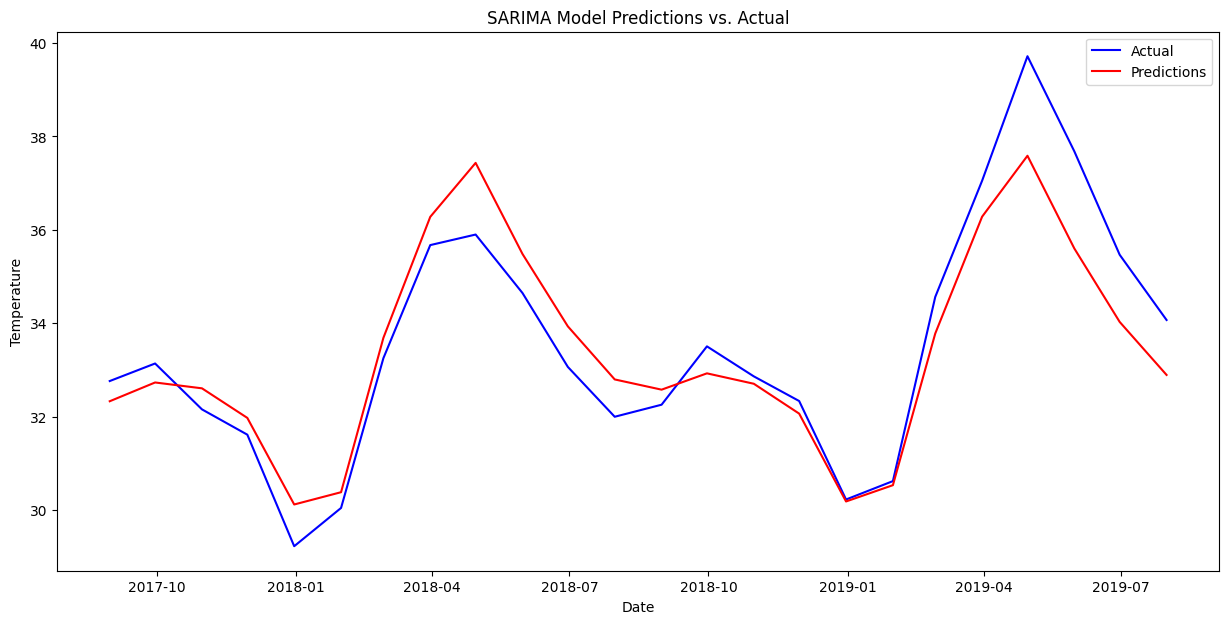

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.title('SARIMA Model Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()